## **Reducción de dimensionalidad / PCA 2 (Core)**

## **Visualización de Datos con Componentes Principales**

### **Descripción:**

En esta actividad, utilizarás el Análisis de Componentes Principales (PCA) para visualizar datos en un espacio de menor dimensionalidad. Trabajarás con el famoso dataset «Iris» para reducir sus características a dos componentes principales y visualizar cómo se distribuyen las diferentes clases en este nuevo espacio de características.

**Enlace al dataset:** https://www.kaggle.com/uciml/iris

### **Objetivo:**

El objetivo es reducir la dimensionalidad del dataset «Iris» mediante PCA, visualizando las clases en el nuevo espacio bidimensional y evaluando si los componentes principales son capaces de capturar adecuadamente la variabilidad de los datos.

### **Instrucciones:**

1. **Carga de datos:**
    - Descarga el dataset «Iris» de Kaggle. Examina las características disponibles, que incluyen el largo y ancho de los sépalos y pétalos de tres especies de flores.
    - Asegúrate de que los datos no contengan valores nulos o atípicos.

2. **Exploración y preprocesamiento de datos:**
    - Realiza una normalización de los datos, ya que PCA requiere que las características tengan la misma escala para funcionar de manera efectiva.
    - Observa la distribución inicial de las variables mediante gráficos de dispersión o histogramas.

3. **Aplicación de PCA:**
    - Implementa PCA para reducir las cuatro dimensiones del dataset «Iris» a solo dos componentes principales.
    - Calcula la «explained variance» para estos dos componentes y discute qué porcentaje de la variabilidad total de los datos está capturada en el espacio bidimensional.

4. **Visualización de los componentes principales:**
    - Proyecta los datos en el espacio bidimensional formado por los dos primeros componentes principales.
    - Utiliza diferentes colores para representar cada una de las tres clases de flores en el gráfico y observa cómo se agrupan las clases en el espacio de los componentes principales.

5. **Interpretación de los resultados:**
    - Analiza los coeficientes de los dos componentes principales y explica qué variables tienen la mayor influencia en estos.
    - Discute si PCA es capaz de separar correctamente las clases y cómo este análisis puede mejorar la comprensión de los datos.

6. **Análisis de Resultados:**

    - Compara la distribución de las clases en el espacio bidimensional con la distribución original de las variables. ¿Qué tan bien puede PCA capturar las relaciones entre las clases en este caso?
    - Realiza un reporte que incluya el gráfico de los componentes principales y discute la utilidad de PCA para la visualización de datos en problemas de clasificación.

### **Conclusión:**

Esta actividad se centra en la visualización de datos utilizando PCA. La reducción de dimensionalidad mediante PCA no solo ayuda a visualizar los datos en un espacio más pequeño, sino que también permite identificar las relaciones entre las variables y las clases.

Importamos las librerias necesarias y el dataset

In [1]:
import os
import pandas as pd
import numpy as np
import utils
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import kagglehub
import kaggle

In [2]:
# 1. Cargar el dataset Iris
iris = load_iris()

# Convertir los datos en un DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Agregar la columna de clases al DataFrame
iris_df["class_names"] = iris.target_names[iris.target]


### **Exploratory Data Analysis**

In [3]:
print("Dimensiones del dataset:")
print(f"Features: {iris_df.shape[1]}, Ejemplos: {iris_df.shape[0]}")
print("Primeras 5 filas del dataset:")
iris_df.head()

Dimensiones del dataset:
Features: 5, Ejemplos: 150
Primeras 5 filas del dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class_names
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### **Analisis de duplicados**

Verificacion de duplicados

In [4]:
duplicados = iris_df.duplicated() # Identificar duplicados
num_duplicados = duplicados.sum() # Contar el número de duplicados
print(f"Número de registros duplicados en el dataset: {num_duplicados}")

Número de registros duplicados en el dataset: 1


In [5]:
# Eliminar duplicados y actualizar el DataFrame
data = iris_df.drop_duplicates()

# Identificar duplicados nuevamente
duplicados = data.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados después de eliminarlos: {num_duplicados}")

Número de registros duplicados después de eliminarlos: 0


Eliminamos los duplicados porque puede sesgar el modelo

#### **Analisis de la distribucion de las variables**

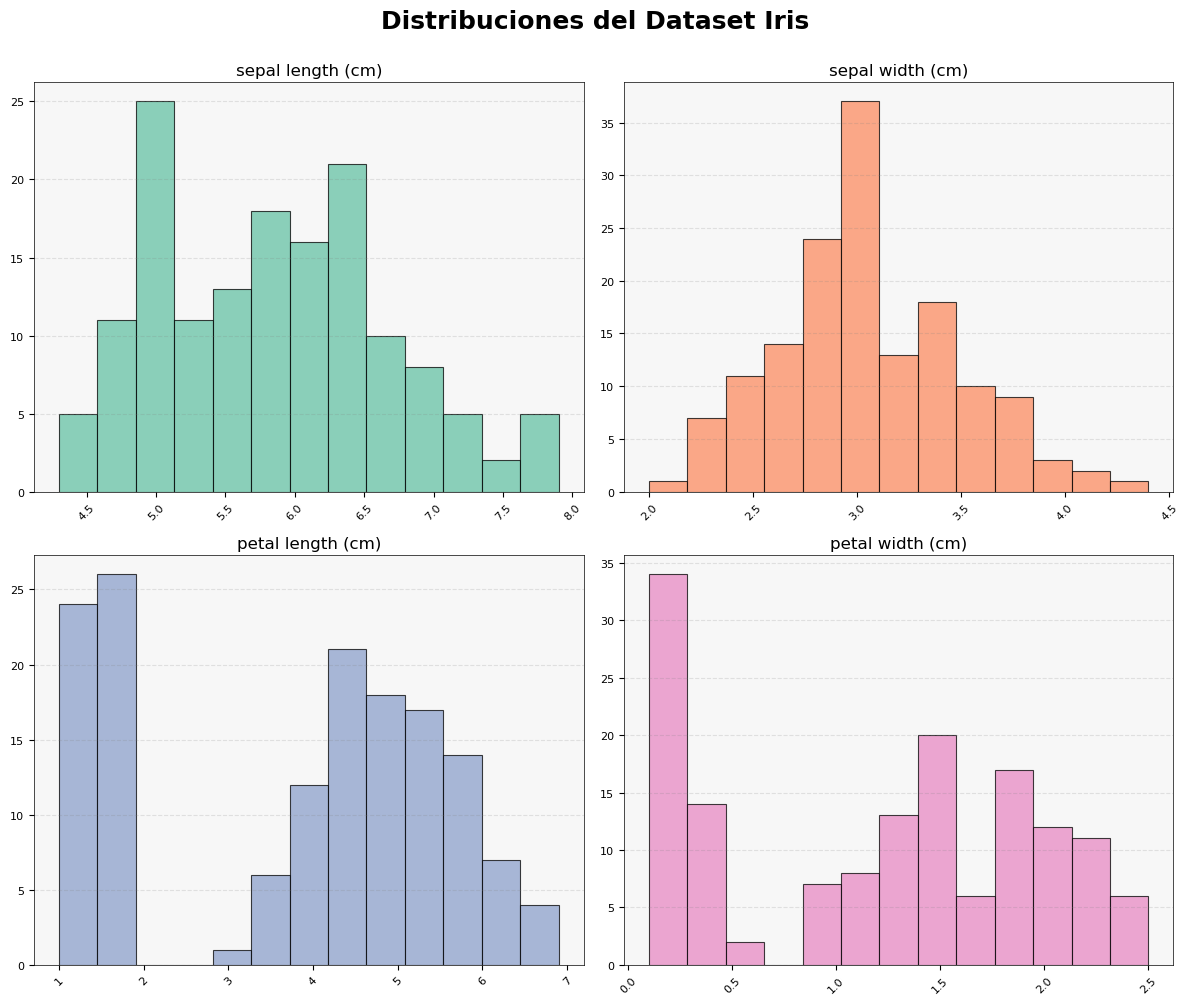

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10)) 
axes = axes.flatten()

colors = sns.color_palette("Set2", len(iris_df.columns))
for i, col in enumerate(iris_df.columns):
    if i < len(axes):  
         # Cambiar a ax.hist()
        axes[i].hist(iris_df[col].dropna(), bins='sqrt', color=colors[i], alpha=0.75, edgecolor='black', linewidth=0.8)
        
        # Estética
        axes[i].set_title(col, fontsize=12, pad=5)
        axes[i].grid(axis='y', linestyle='--', color='gray', alpha=0.2)
        axes[i].set_facecolor('#f7f7f7')
        axes[i].spines['top'].set_color('black')
        axes[i].spines['top'].set_linewidth(0.5)
        axes[i].spines['right'].set_color('black')
        axes[i].spines['right'].set_linewidth(0.5)
        axes[i].spines['left'].set_color('black')
        axes[i].spines['left'].set_linewidth(0.5)
        axes[i].spines['bottom'].set_color('black')
        axes[i].spines['bottom'].set_linewidth(0.5)
        axes[i].tick_params(axis='x', rotation=45, labelsize=8, colors='black')
        axes[i].tick_params(axis='y', labelsize=8, colors='black')

# Eliminar ejes sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general y espaciado
fig.suptitle('Distribuciones del Dataset Iris', fontsize=18, fontweight='bold', y= 1)
plt.tight_layout()
plt.show()


Explicacion

#### **Relacion por pares**

<Figure size 1500x1200 with 0 Axes>

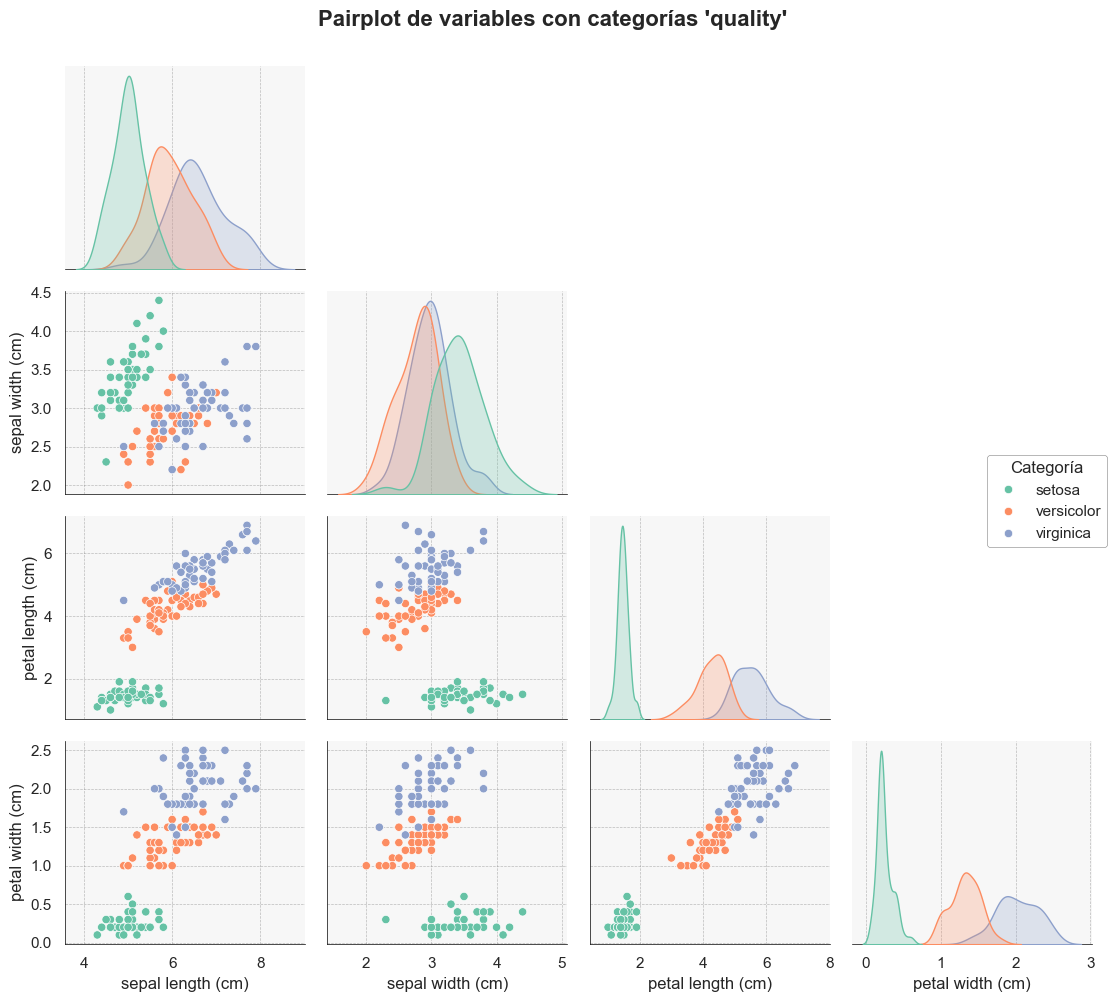

In [7]:
plt.figure(figsize=(15, 12))

# Configurar el estilo general de Seaborn
sns.set_theme(style="whitegrid", palette="Set2")

# Crear el pairplot con personalizaciones
pairplot = sns.pairplot(
    iris_df,
    hue="class_names",  # Variable para colorear las categorías
    palette="Set2",  # Paleta de colores
    diag_kind="kde",  # Mostrar densidad en la diagonal
    corner=True,  # Mostrar solo la parte inferior (para gráficos más claros)
)

# Personalizar títulos y etiquetas de ejes
pairplot.figure.suptitle(
    "Pairplot de variables con categorías 'quality'", 
    y= 1,  # Ajustar la posición del título
    fontsize=16, 
    fontweight="bold"
)

# Personalizar el fondo y líneas de los gráficos
for ax in pairplot.axes.flatten():
    if ax:  # Evitar errores en celdas vacías
        ax.set_facecolor("#f7f7f7")  # Fondo claro
        ax.spines['top'].set_color('black')  # Ocultar borde superior
        ax.spines['top'].set_linewidth(0.5)
        ax.spines['right'].set_color('black')  # Ocultar borde derecho
        ax.spines['right'].set_linewidth(0.5)
        ax.spines['left'].set_color('black')  # Grosor de bordes
        ax.spines['left'].set_linewidth(0.5)
        ax.spines['bottom'].set_color('black')
        ax.spines['bottom'].set_linewidth(0.5)
        ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)  # Personalizar cuadrícula

# Ajustar leyenda
pairplot._legend.set_title("Categoría")  # Cambiar título de la leyenda
pairplot._legend.set_frame_on(True)  # Fondo en la leyenda
pairplot._legend.get_frame().set_edgecolor("gray")  # Borde de la leyenda
pairplot._legend.get_frame().set_linewidth(0.5)

plt.tight_layout()
plt.show()

Explicacion

#### **Verificacion de valores nulos**

In [8]:
utils.calculate_na_statistics(iris_df)

,datos sin NAs en q,Na en q,Na en %
sepal length (cm),150,0,0.0
sepal width (cm),150,0,0.0
petal length (cm),150,0,0.0
petal width (cm),150,0,0.0
class_names,150,0,0.0


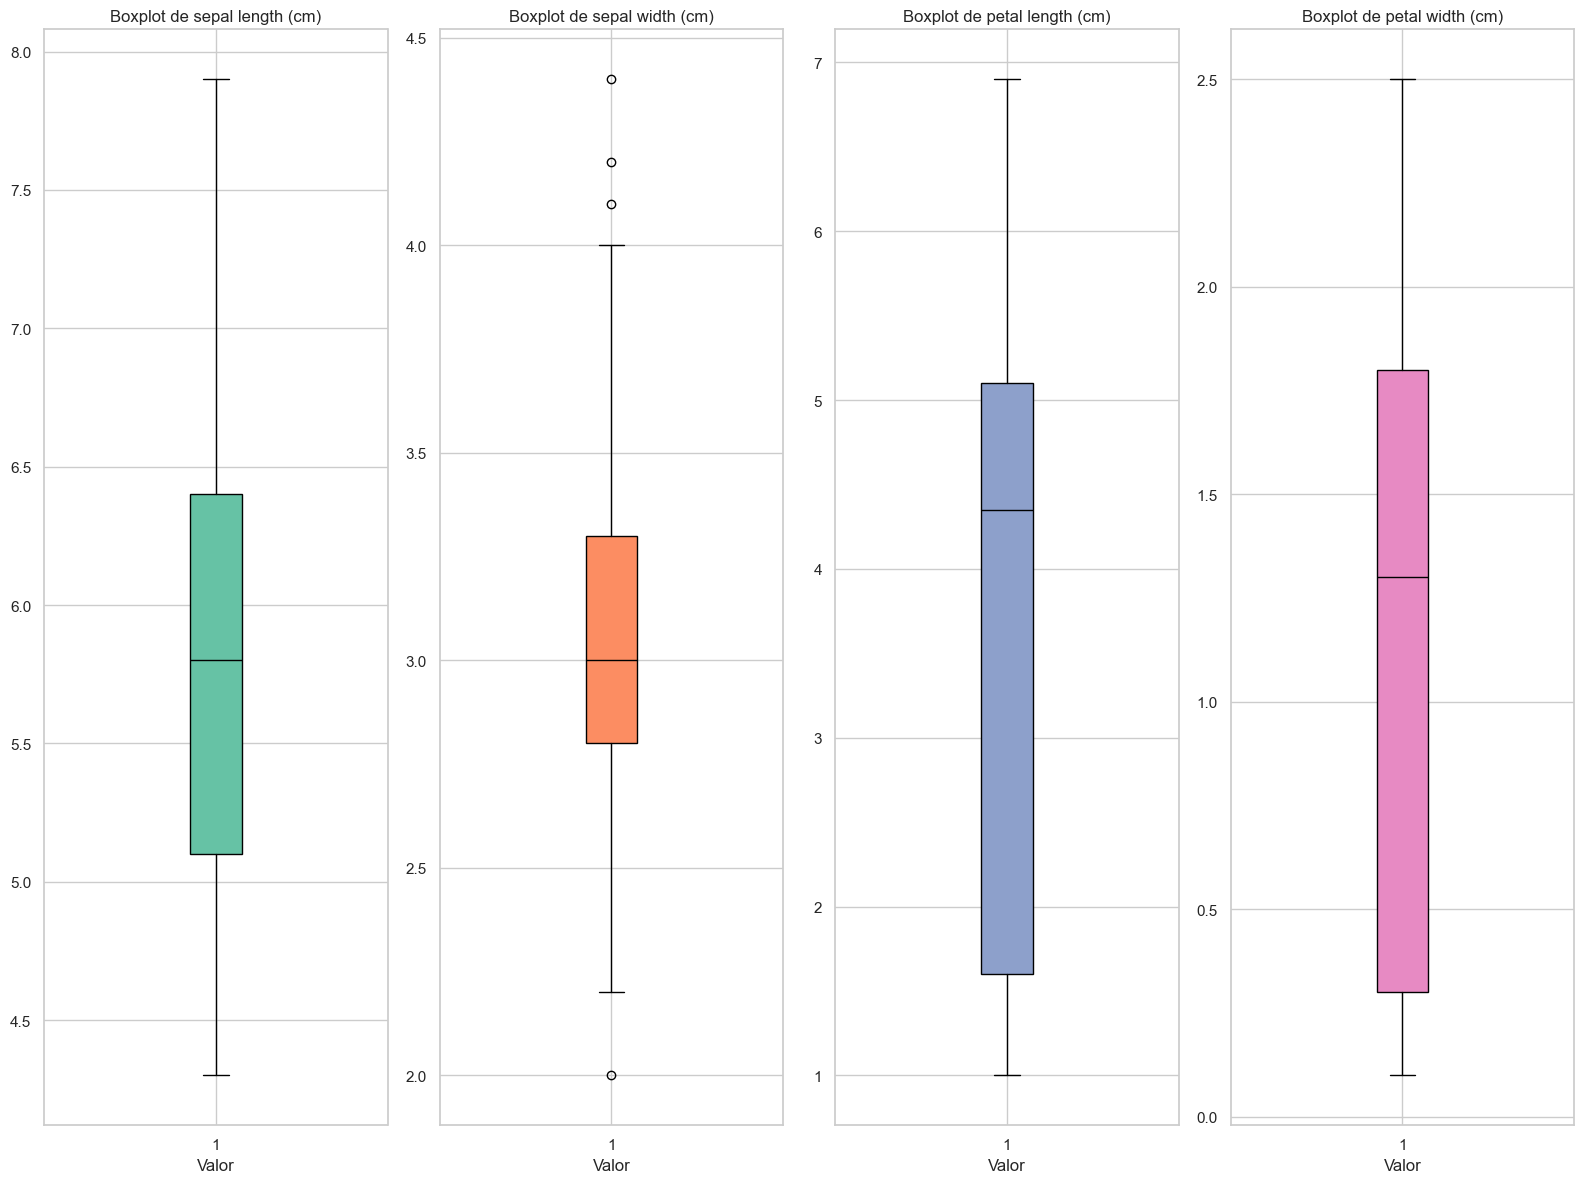

In [9]:
# Obtener el número de columnas que se desean graficar
num_cols = iris_df.select_dtypes(include=[np.number]).shape[1]  # Solo columnas numéricas

# Crear un número adecuado de subgráficos con un máximo de 6 columnas por fila
ncols = 4  # Máximo 6 columnas por fila
nrows = -(-num_cols // ncols)  # Calcular filas necesarias, redondeando hacia arriba
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4 * ncols, 12 * nrows))
axes = axes.flatten()  # Asegurarse de que 'axes' sea un arreglo plano


# Obtener una paleta de colores de seaborn
colors = sns.color_palette("Set2", num_cols)

# Graficar cada variable en un boxplot separado
for i, col in enumerate(iris_df.select_dtypes(include=[np.number])):
    # Convertir la columna a numérica, forzando valores no numéricos a NaN
    datos_columna = pd.to_numeric(iris_df[col], errors='coerce')
    
    # Graficar solo si la columna contiene datos numéricos
    if datos_columna.dropna().shape[0] > 0:  # Verificar que haya valores válidos
        # Asignar color y modificar la línea de la mediana
        axes[i].boxplot(datos_columna.dropna(), vert=True, patch_artist=True, 
                        boxprops=dict(facecolor=colors[i]),
                        medianprops=dict(color='black'))  # Línea de la mediana en negro
        axes[i].set_title(f'Boxplot de {col}')
        axes[i].set_xlabel('Valor')
        axes[i].grid(True)

# Ajustar el diseño
plt.tight_layout()
plt.show()


Explicacion

#### **Verificacion de outliers**

In [10]:
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in iris_df.select_dtypes(include=[np.number]):
    outliers = utils.detect_outliers_iqr(data[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': data[column][~outliers].min(),
        'Upper Bound': data[column][~outliers].max()
    }

outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
sepal length (cm),0.0,0.000000,4.3,7.9
sepal width (cm),4.0,2.684564,2.2,4.0
petal length (cm),0.0,0.000000,1.0,6.9
petal width (cm),0.0,0.000000,0.1,2.5


Boxplots por tipo de especie

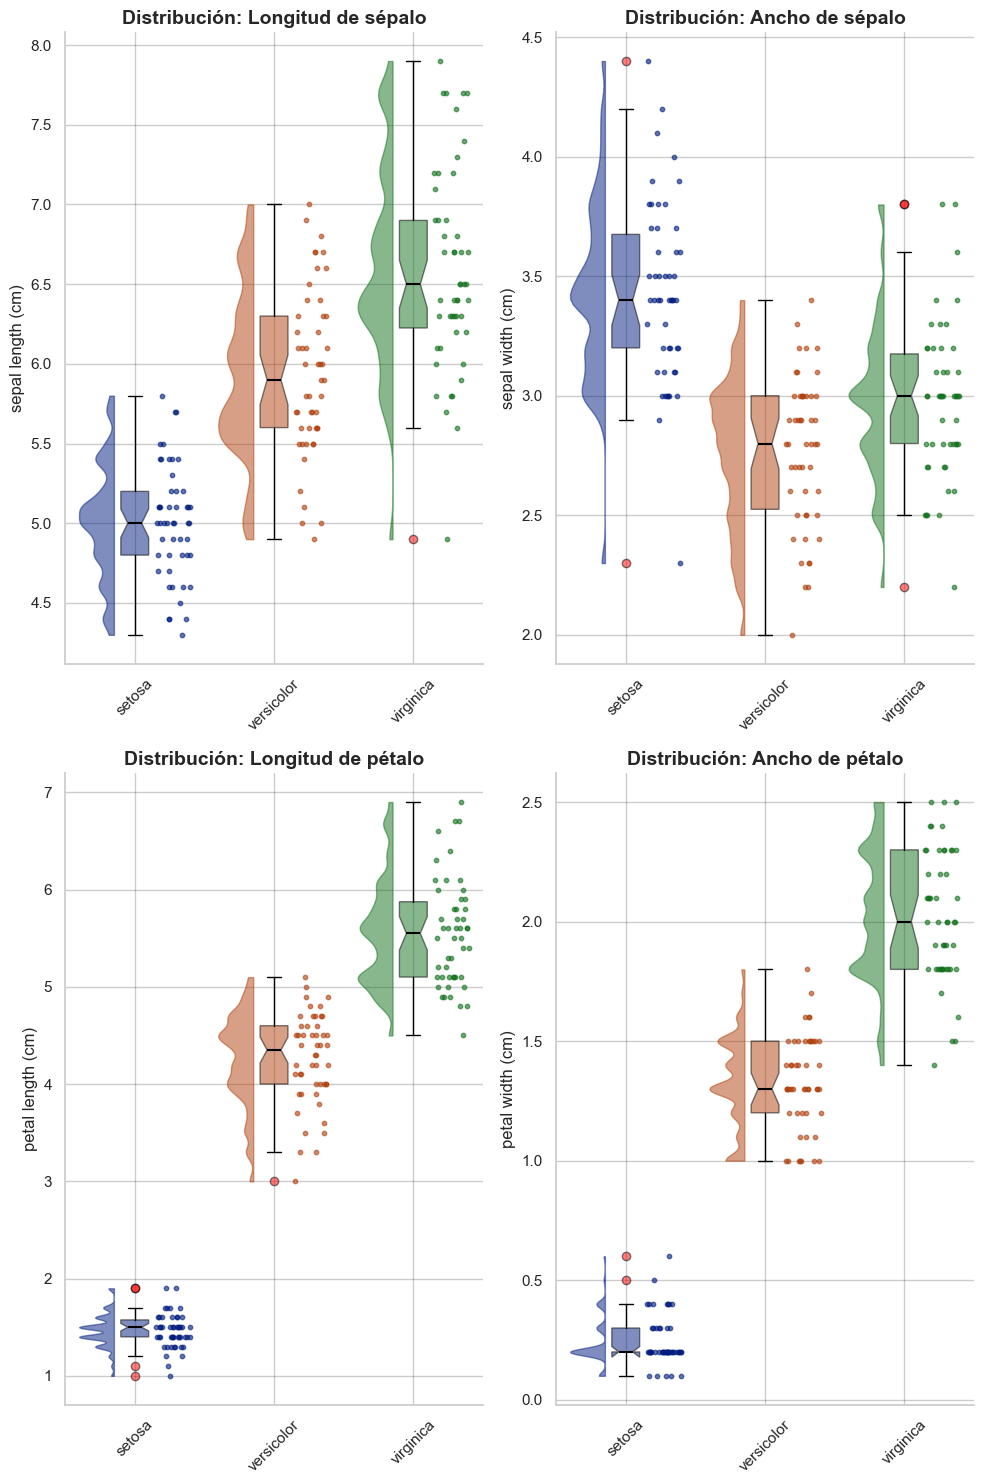

In [11]:
# Crear una figura con subplots (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(10, 15))

# Configurar las combinaciones de características y sus títulos
features = [
    "sepal length (cm)",
    "sepal width (cm)",
    "petal length (cm)",
    "petal width (cm)"
]

titles = [
    "Distribución: Longitud de sépalo",
    "Distribución: Ancho de sépalo",
    "Distribución: Longitud de pétalo",
    "Distribución: Ancho de pétalo"
]

# Iterar sobre los subplots y características
for ax, feature, title in zip(axes.flat, features, titles):
    utils.plot_distribution_combo(
        data=iris_df,
        category_col='class_names',
        value_col=feature,
        figsize=None,  # Dejar el tamaño al subplot
        palette='dark',
        violin_width=0.5,
        box_width=0.20,
        bw_method=0.15,
        ax=ax  # Pasar el eje específico
    )
    ax.set_title(title, fontsize=14, fontweight="bold")

# Ajustar el diseño
plt.tight_layout()
plt.show()


Explicacion

### **PCA**

Separamos las variables

In [12]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target  # Etiquetas de clase (0, 1, 2)
class_names = iris.target_names  # Nombres de las clases

Estandarizamos y aplicamos el PCA

In [13]:
# 2. Exploración y preprocesamiento
# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicación de PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Varianza explicada por el primer componente: 0.73
Varianza explicada por el segundo componente: 0.23
Varianza total explicada por los dos componentes: 0.96


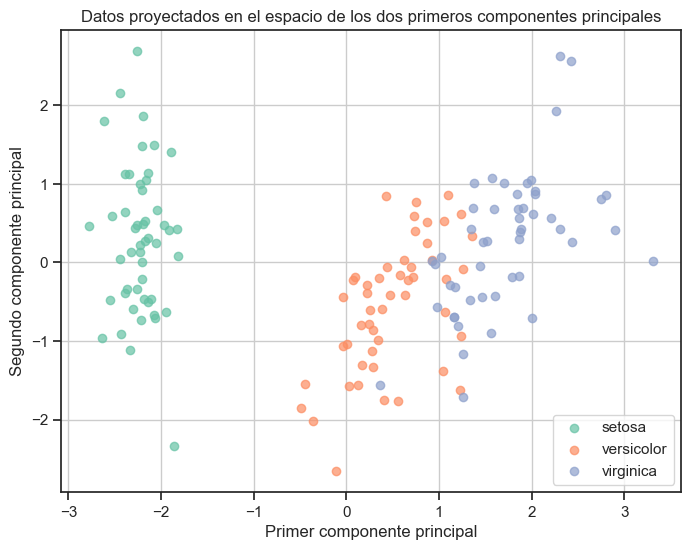

In [14]:
# Varianza explicada por los dos primeros componentes principales
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por el primer componente: {explained_variance[0]:.2f}")
print(f"Varianza explicada por el segundo componente: {explained_variance[1]:.2f}")
print(f"Varianza total explicada por los dos componentes: {sum(explained_variance):.2f}")

# 4. Visualización de los componentes principales
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(class_names):
    plt.scatter(
        X_pca[y == i, 0], X_pca[y == i, 1], label=class_name, alpha=0.7
    )

plt.xlabel("Primer componente principal")
plt.ylabel("Segundo componente principal")
plt.title("Datos proyectados en el espacio de los dos primeros componentes principales")
plt.legend()
plt.grid(True)
plt.show()

Explicacion